Importing Libiraries

https://www.kaggle.com/datasets/chetankv/dogs-cats-images Download Data Set from Here 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore

Path of Data sets 

In [2]:
dog = "E:\\Internship\\Prodigy Infotech\\Task and Solutions\\Task no 3\\dataset\\dogs"
cat = "E:\\Internship\\Prodigy Infotech\\Task and Solutions\\Task no 3\\dataset\\cats"

Load and preprocess the dataset 

In [3]:
# Define image dimensions
IMG_SIZE = (64, 64)

# Load dataset
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=IMG_SIZE)
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

In [4]:
cat_images, cat_labels = load_images_from_folder(cat, 0)
dog_images, dog_labels = load_images_from_folder(dog, 1)

Feature Extraction 

In [5]:
# Combine the datasets
X = np.concatenate((cat_images, dog_images), axis=0)
y = np.concatenate((cat_labels, dog_labels), axis=0)

In [6]:
# Normalize the images
X = X / 255.0
# Flatten the images
X_flattened = X.reshape(X.shape[0], -1)


Split test and Training data 

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)



Model Training

In [8]:
# Initialize and train the KNN classifier
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [9]:
# Predict labels for the test set
y_pred = knn_classifier.predict(X_test)




Plot the Graph 

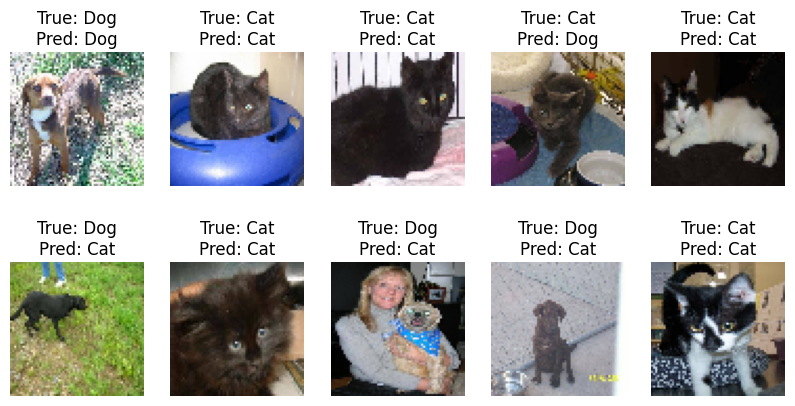

In [10]:
# Plot some test images with their predicted and true labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(64, 64, 3))
    plt.title(f"True: {'Dog' if y_test[i] else 'Cat'}\nPred: {'Dog' if y_pred[i] else 'Cat'}")
    plt.axis('off')
plt.show()
